In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pybnn.bohamiann import Bohamiann

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [3]:
def f(x):
    return np.sinc(x * 10 - 5)

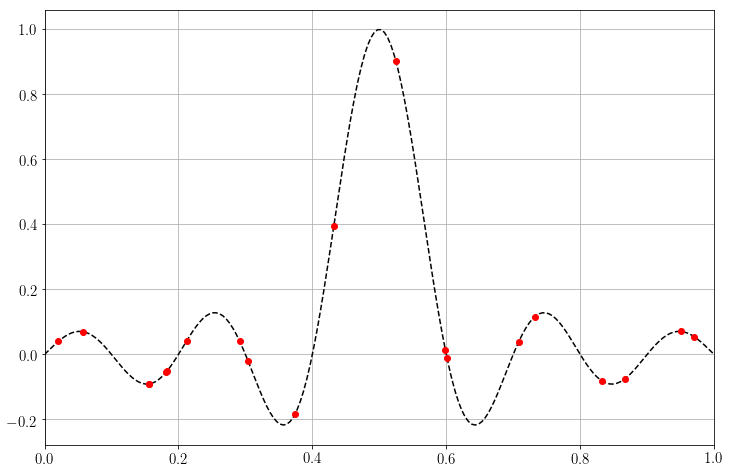

In [4]:
rng = np.random.RandomState(42)

x = rng.rand(20)
y = f(x)

grid = np.linspace(0, 1, 200)
fvals = f(grid)

plt.plot(grid, fvals, "k--")
plt.plot(x, y, "ro")
plt.grid()
plt.xlim(0, 1)

plt.show()

In [21]:
model = Bohamiann(print_every_n_steps=1000)
model.train(x[:, None], y, num_steps=20000, num_burn_in_steps=2000, keep_every=50, lr=1e-2, verbose=True)

Step     1000 : NLL = -3.3293e+00 MSE = 3.8823e-05 Time =  3.53


/home/kleinaa/devel/git/pybnn/pybnn/bohamiann.py:119: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  for parameter in self.model.parameters()


Step     3000 : NLL = -3.1486e+00 MSE = 1.3297e-05 Samples= 19 Time = 10.08
Step     4000 : NLL = -3.4862e+00 MSE = 3.4155e-06 Samples= 39 Time = 12.99
Step     5000 : NLL = -3.6554e+00 MSE = 2.4016e-06 Samples= 59 Time = 16.37
Step     6000 : NLL = -3.7636e+00 MSE = 1.9805e-06 Samples= 79 Time = 19.65
Step     7000 : NLL = -3.8400e+00 MSE = 1.5966e-06 Samples= 99 Time = 22.86
Step     8000 : NLL = -3.8879e+00 MSE = 1.3900e-06 Samples= 119 Time = 26.07
Step     9000 : NLL = -3.9226e+00 MSE = 1.5175e-06 Samples= 139 Time = 29.09
Step    10000 : NLL = -3.9583e+00 MSE = 1.7895e-06 Samples= 159 Time = 31.91
Step    11000 : NLL = -3.9997e+00 MSE = 1.5271e-06 Samples= 179 Time = 34.75
Step    12000 : NLL = -4.0349e+00 MSE = 1.5743e-06 Samples= 199 Time = 37.66
Step    13000 : NLL = -3.9537e+00 MSE = 1.4077e-06 Samples= 219 Time = 40.50
Step    14000 : NLL = -3.9899e+00 MSE = 1.4487e-06 Samples= 239 Time = 43.66
Step    15000 : NLL = -4.0090e+00 MSE = 1.4296e-06 Samples= 259 Time = 46.88
Step

(359, 200)


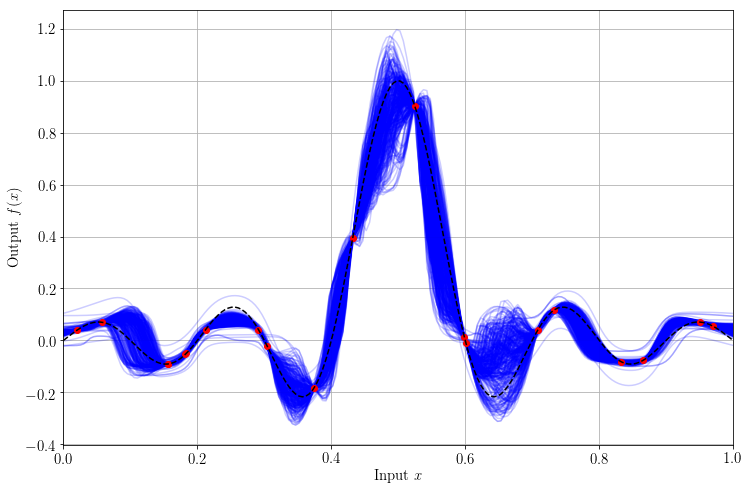

In [22]:
m, v, samples = model.predict(grid[:, None], return_individual_predictions=True)

print(samples.shape)
for sample in samples:
    plt.plot(grid, sample, "blue", alpha=0.2)

plt.plot(x, y, "ro")
plt.grid(True)
plt.plot(grid, fvals, "k--")

plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()

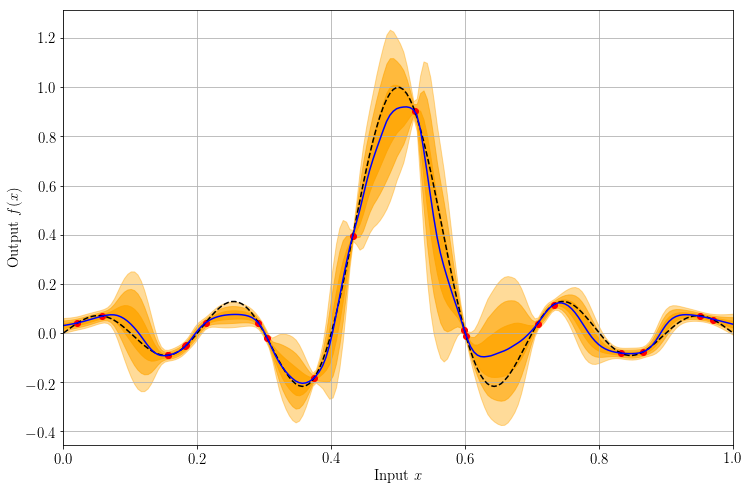

In [23]:
m, v = model.predict(grid[:, None])

plt.plot(x, y, "ro")
plt.grid()
plt.plot(grid, fvals, "k--")
plt.plot(grid, m, "blue")
plt.fill_between(grid, m + np.sqrt(v), m - np.sqrt(v), color="orange", alpha=0.8)
plt.fill_between(grid, m + 2 * np.sqrt(v), m - 2 * np.sqrt(v), color="orange", alpha=0.6)
plt.fill_between(grid, m + 3 * np.sqrt(v), m - 3 * np.sqrt(v), color="orange", alpha=0.4)
plt.xlim(0, 1)
plt.xlabel(r"Input $x$")
plt.ylabel(r"Output $f(x)$")
plt.show()